<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/stats_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
print('done')

done


In [27]:
df= pd.read_csv('/content/Laliga.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [28]:
r= {i:j for i,j in zip(df.columns, df.iloc[0].values)}

In [29]:
df.rename(r, axis=1, inplace=True)

In [30]:
df.drop(0, inplace= True)

In [31]:
df.set_index('Pos', inplace= True)

In [32]:
df.head()

,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
Pos,,,,,,,,,,,,,,,,,,,
1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [33]:
df.shape

(61, 19)

In [34]:
for i in df.columns:
  df[i].replace({'-': np.nan}, inplace= True)

In [35]:
for i in range(len(df['Debut'].values)):
  if '-' in df['Debut'].values[i]:
    df['Debut'].values[i] = df['Debut'].values[i].split('-')[0]

In [36]:
for i in range(len(df['Since/LastApp'].values)):
  if '-' in df['Since/LastApp'].values[i]:
    df['Since/LastApp'].values[i] = '{}{}'.format(df['Since/LastApp'].values[i].split('-')[0][:2], df['Since/LastApp'].values[i].split('-')[1])

In [37]:
for i in df.columns[1:]:
  df[i] = df[i].astype(float)

In [38]:
df.dtypes

Team              object
Seasons          float64
Points           float64
GamesPlayed      float64
GamesWon         float64
GamesDrawn       float64
GamesLost        float64
GoalsFor         float64
GoalsAgainst     float64
Champion         float64
Runner-up        float64
Third            float64
Fourth           float64
Fifth            float64
Sixth            float64
T                float64
Debut            float64
Since/LastApp    float64
BestPosition     float64
dtype: object

In [39]:
#1

df.loc[(df['Debut']>=1930) & (df['Debut']<=1980)]['Team']

Pos
4                Valencia
6                 Sevilla
9                Zaragoza
10             Real Betis
11    Deportivo La Coruna
12             Celta Vigo
13             Valladolid
15         Sporting Gijon
16                Osasuna
17                 Malaga
18                 Oviedo
19               Mallorca
20             Las Palmas
22                Granada
23         Rayo Vallecano
24                  Elche
26               Hercules
27               Tenerife
28                 Murcia
29                 Alaves
30                Levante
31              Salamanca
32               Sabadell
33                  Cadiz
35              Castellon
38                Cordoba
40             Recreativo
41              Burgos CF
42             Pontevedra
47              Gimnastic
50               Alcoyano
51                   Jaen
53             AD Almeria
55                 Lleida
58                 Condal
59        Atletico Tetuan
60       Cultural Leonesa
Name: Team, dtype: object

In [40]:
#2
df.sort_values(by='Points', ascending=False)[:5]['Team']

Pos
1        Real Madrid
2          Barcelona
3    Atletico Madrid
4           Valencia
5    Athletic Bilbao
Name: Team, dtype: object

In [41]:
#3 

In [42]:
df['win_p'] = [(df['GamesWon'].values[i]/df['GamesPlayed'].values[i])*100 for i in range(df.shape[0])]

In [43]:
df.head()

,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,win_p
Pos,,,,,,,,,,,,,,,,,,,,
1,Real Madrid,86.0,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,8.0,8.0,3.0,4.0,79.0,1929.0,1929.0,1.0,59.630702
2,Barcelona,86.0,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,12.0,12.0,4.0,6.0,83.0,1929.0,1929.0,1.0,57.241130
3,Atletico Madrid,80.0,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,16.0,9.0,7.0,6.0,56.0,1929.0,2003.0,1.0,47.475134
4,Valencia,82.0,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,10.0,11.0,10.0,7.0,50.0,1931.0,1988.0,1.0,44.557057
5,Athletic Bilbao,86.0,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,10.0,5.0,8.0,10.0,49.0,1929.0,1929.0,1.0,43.772629


skew 1.4400457145184595


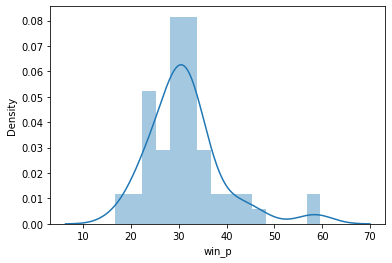

In [44]:
sns.distplot(df['win_p'])
print('skew', df['win_p'].skew())

In [45]:
df.sort_values(by='win_p', ascending=False)[:5]['Team']

Pos
1        Real Madrid
2          Barcelona
3    Atletico Madrid
4           Valencia
5    Athletic Bilbao
Name: Team, dtype: object

In [46]:
# 4

# Null hypothesis: There is no significant difference between team with position between 1-3 and teams with positions 4-7
# Alternate hypothesis: there is significant difference 

# we dont know population parameters. 
# 2 sample unpaired t test

In [47]:
x_1to3 = df.loc[(df['BestPosition']>=1) & (df['BestPosition']<=3)]['win_p'].values
x_4to7 = df.loc[(df['BestPosition']>=4) & (df['BestPosition']<=7)]['win_p'].values

In [48]:
# Shapiro tests for checking parametricity

# Null hypothesis: Both of the distribution follow Normal Distribution

from scipy.stats import shapiro

stats1,p1 = shapiro(x_1to3)
print(stats1, p1)

0.8252524733543396 0.0035329433158040047


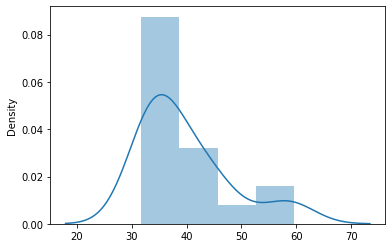

In [49]:
sns.distplot(x_1to3)

In [50]:
# using a Kruskal test since one of our sample is NOT normaly distributed.

test_st, p_v = stats.kruskal(x_1to3, x_4to7)

In [51]:
print(test_st, p_v)

24.413782495561865 7.771074596666456e-07


In [52]:
# teams with positions 4-7

stats2,p2 = shapiro(x_4to7)
print(stats2, p2)

0.9436671733856201 0.2809881269931793


In [53]:
# means: 
print(np.mean(x_1to3))
print(np.mean(x_4to7))

39.674123684661126
30.2910202207672


Since p value is lesser than 0.05, we reject the null hypothesis
there is indeed statistical evidence to say that there is significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

# 2

In [54]:
n= 200
xbar = 140
std = 25

In [55]:
#1
se= 25/np.sqrt(n)
print(se)

1.7677669529663687


Standard error is 1.7677669529663687. It denotes how accurate and relaible our estimation of the population mean is- based upon the calculated sample mean. 
The "standard error of the mean" refers to the standard deviation of the distribution of sample means taken from a population. The smaller the standard error, the more representative the sample will be of the overall population.

In [56]:
# 2

# Since population mean/std is not given, we continue with t stat intervals.

In [57]:
a1,b1= stats.t.interval(0.95,loc=xbar, df= n-1,scale=se)
print(a1,b1)

136.51404038839016 143.48595961160984


In [58]:
#3

a2,b2 = stats.t.interval(0.95,loc=xbar, df= 99,scale=se)
print(a2,b2)

136.49236684560728 143.50763315439272


In [59]:
#4
print(abs(a1-b1))
print(abs(a2-b2))

6.971919223219686
7.015266308785442


In [60]:
# sample with 100 one is more wider

## 5

The reason why the estimated standard error of a sample mean tends to decrease with an increase in sample size is because in SE formula- we divide by the square root of sample size- now- the bigger the magnitude of denominator - smaller is the value of the the fraction. 

Statistically, SE tends to generalize the estimation- the bigger the sample size- it gets lesser and lesser generalized. 

In [61]:
# 3

df2= pd.read_csv('/content/Golf.csv')
df2.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


# A

Null hypothesis: The mean of driving distance of current model and previous model is same. ( Ub = Ua) i;e No difference in mean Ub-Ua = 0

Alternate: there is a significant difference in means of driving distance of current model and previous model is same. ( Ub != Ua)
i;e Ub - Ua < 0

In [62]:
# we can do a paired one tail t test

curr= df2['Current']
new= df2['New']

n= len(curr)
x1= np.mean(curr)
std1= np.std(curr)
se1= std1/np.sqrt(n)

x2= np.mean(new)
std2= np.std(new)
se2= std2/np.sqrt(n)

print(x1, 'curr')
print(x2, 'new')

270.275 curr
267.5 new


In [63]:
# we can see that there is slight decrese in driving distance of the new coated ball, BUT is this difference significant enough?

In [64]:
# check normality

stats.shapiro(curr)

(0.9707045555114746, 0.37878310680389404)

In [65]:
stats.shapiro(new)

(0.9678265452384949, 0.3064688742160797)

In [60]:
# both are normal, we can use a t test

In [67]:
T_stats_, pval = stats.ttest_rel(curr, new)
print(T_stats_, pval)

1.2769699827911767 0.20916361823147053


In [68]:
# Since we are only concerned about the one half, 

pval/2

0.10458180911573527

### The p value is = 0.1045

Since P value is greater than 0.05, we fail to reject the null hypothesis. 

There is indeed NO SIGNIFICANT difference in driving distance after the coating.

## My recommendation to Par Inc. is to go ahead with the coating technology as there is no significant  difference in driving distance after the coating even after the coating. 

In [70]:
# 3

#a
stats.t.interval(0.95, loc=x1,df=n-1, scale=se1)

(267.51087288314795, 273.039127116852)

In [71]:
# b

stats.t.interval(0.95, loc=x2,df=n-1, scale=se2)

(264.37463162538575, 270.62536837461425)

In [72]:
# what is the 95% confidence interval for the difference between the means of the two population?

dif= x1 - x2
print(dif)

2.7749999999999773


In [60]:
# we use standard error to estimate population std dev. 

In [73]:
upl= (se1**2)/n
lpl= (se2**2)/n

print(upl)
print(lpl)

0.046687109375
0.059687500000000004


In [74]:
sr = np.sqrt(upl+lpl)
sr

0.3261512063062162

In [75]:
final_pl = 1.96 * sr
final_pl

0.6392563643601837

## Our 95% CI for estimating difference between means of two population is:

upper c_value = 2.774 + 0.6392

lower c_value = 2.774 - 0.6392